In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle,Circle

from scipy.stats import chi2
from scipy.io import loadmat
import time

from lanczos_bin import *
#from lanczos_bin import mystep,distribution

from IPython.display import clear_output
np.set_printoptions(linewidth=300)
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
# Log determinant of ThermomechTC matrix
P = loadmat('therm.mat')
A = P['A']

delta = 0.05
b = 2
n = 35
f = lambda x : np.log(x)
texact = -546787


In [4]:
ntrials = 50
ps =  range(5,10)
KRY = np.zeros((4,ntrials*len(ps)))
HPP = np.zeros((4,ntrials*len(ps)))

k = 0
np.random.seed(0)
for (i,p) in enumerate(ps):
    for j in range(ntrials):
        print(f'{i}: trial {j}')
        clear_output(wait=True)
        
        epsilon = abs(texact) * 2**(-p)
        t, c, r = ada_krylov(A,f,b,n,epsilon,delta)
        KRY[0,k] = abs(t-texact)/abs(texact)
        KRY[1,k] = c+r
        KRY[2,k] = c
        KRY[3,k] = r
        
        t, c, r = ada_hpp(A,f,n,epsilon,delta)
        HPP[0,k] = abs(t-texact)/abs(texact)
        HPP[1,k] = c+r
        HPP[2,k] = c
        HPP[3,k] = r
        
        k = k + 1

4: trial 49


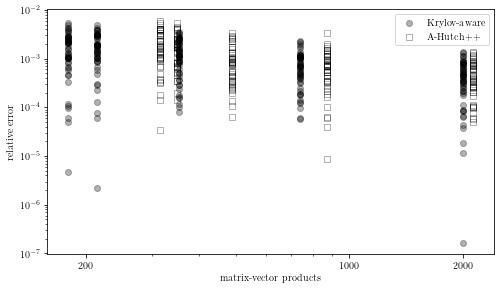

In [9]:
fig,axs = plt.subplots(1,1,figsize=(8,4.5))
axs = [axs]


axs[0].scatter(KRY[1,:],abs(KRY[0,:]),alpha=.3,c='black',label='Krylov-aware')
axs[0].scatter(HPP[1,:],abs(HPP[0,:]),alpha=.3,c='none',marker="s",edgecolors='black',label='A-Hutch++')


axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xticks([200,1000,2000])
axs[0].set_xticklabels([200,1000,2000])

plt.xlabel("matrix-vector products")
plt.ylabel("relative error")

plt.legend()

plt.savefig('imgs/thermo-logdet.pdf')

In [7]:
lp = len(ps)

Kdfl = np.reshape(KRY[2,:],(lp,ntrials))
Krem = np.reshape(KRY[3,:],(lp,ntrials))
Kmd  = np.mean(Kdfl,axis=1)
Kmr  = np.mean(Krem,axis=1)

Hdfl = np.reshape(HPP[2,:],(lp,ntrials))
Hrem = np.reshape(HPP[3,:],(lp,ntrials))
Hmd  = np.mean(Hdfl,axis=1)
Hmr  = np.mean(Hrem,axis=1)

dat = np.zeros((lp,11))
dat[:,0] = np.array(ps)[:lp]
dat[:,1] = Kmd - (n-1)*b
dat[:,2] = Kmr/n
dat[:,3] = Kmd
dat[:,4] = Kmr
dat[:,5] = Kmd+Kmr
dat[:,6] = Hmd/(2*n)
dat[:,7] = Hmr/n
dat[:,8] = Hmd
dat[:,9] = Hmr
dat[:,10] = Hmd+Hmr

np.set_printoptions(precision=4)
np.set_printoptions(linewidth=160)
np.set_printoptions(suppress=True)
print(np.round(dat).astype(int))


[[   5    6    3   74  105  179    3    3  210  105  315]
 [   6    6    4   74  140  214    3    4  210  140  350]
 [   7    6    8   74  280  354    3    8  210  280  490]
 [   8    6   19   74  665  739    3   19  210  665  875]
 [   9    6   55   74 1925 1999    3   55  210 1925 2135]]
